Creating PyTorch DataLoaders for ISPRS Potsdam/Vaihingen Datasets
Loaded 6577 patches from vaihingen dataset (train split)
Loaded 960 patches from vaihingen dataset (val split)
Loaded 864 patches from vaihingen dataset (test split)

DataLoader Information:
Train batches: 1645
Validation batches: 240
Test batches: 216

Testing batch loading...
Successfully loaded a batch!
Image batch shape: torch.Size([4, 3, 256, 256])
Label batch shape: torch.Size([4, 256, 256])
Image dtype: torch.float32, range: [-1.810, 2.640]
Label dtype: torch.int64, unique values: [0, 1, 2, 3, 4]

Visualizing samples...


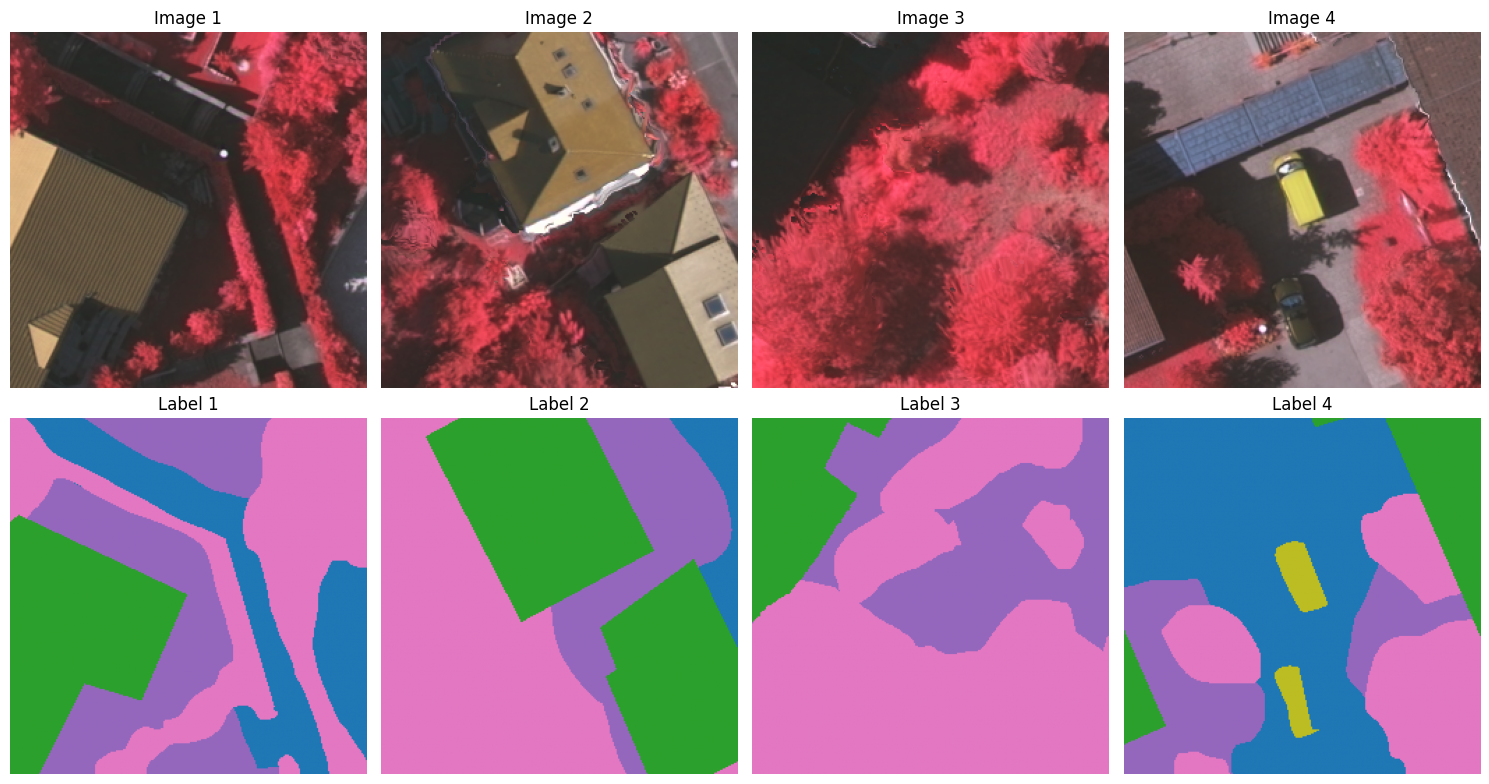

In [3]:
"""
Example script demonstrating how to use the Potsdam/Vaihingen dataset loader.
Focus on dataset loading and visualization only.
"""

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from dataset_utils import create_dataloaders, PotsdamVaihingenDataset, get_transforms

def visualize_batch(dataloader, num_samples=4, save_path=None):
    """Visualize a batch of samples from the dataloader."""
    
    # Get a batch
    images, labels = next(iter(dataloader))
    
    # Select subset of samples to visualize
    num_samples = min(num_samples, len(images))
    
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 8))
    if num_samples == 1:
        axes = axes.reshape(2, 1)
    
    for i in range(num_samples):
        # Get image and label
        img = images[i]
        lbl = labels[i]
        
        # Denormalize image for visualization
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        img_denorm = img * std + mean
        img_denorm = torch.clamp(img_denorm, 0, 1)
        
        # Convert to numpy and transpose for matplotlib
        img_np = img_denorm.permute(1, 2, 0).numpy()
        lbl_np = lbl.numpy()
        
        # Plot image
        axes[0, i].imshow(img_np)
        axes[0, i].set_title(f'Image {i+1}')
        axes[0, i].axis('off')
        
        # Plot label with colormap
        im = axes[1, i].imshow(lbl_np, cmap='tab10', vmin=0, vmax=5)
        axes[1, i].set_title(f'Label {i+1}')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"Visualization saved to {save_path}")
    else:
        plt.show()

def main():
    """Main function demonstrating dataset usage."""
    
    # Configuration
    root_dir = "./data"
    dataset_name = "vaihingen"  # possible: 'potsdam','vaihingen','both'
    patch_size = 256
    stride = 128
    batch_size = 4
    num_workers = 2
    
    print("Creating PyTorch DataLoaders for ISPRS Potsdam/Vaihingen Datasets")
    print("="*70)
    
    # Create dataloaders
    train_loader, val_loader, test_loader = create_dataloaders(
        root_dir=root_dir,
        dataset=dataset_name,
        patch_size=patch_size,
        stride=stride,
        batch_size=batch_size,
        num_workers=num_workers
    )
    
    print(f"\nDataLoader Information:")
    print(f"Train batches: {len(train_loader)}")
    print(f"Validation batches: {len(val_loader)}")
    print(f"Test batches: {len(test_loader)}")
    
    # Test loading a batch
    if len(train_loader) > 0:
        print(f"\nTesting batch loading...")
        for images, labels in train_loader:
            print(f"Successfully loaded a batch!")
            print(f"Image batch shape: {images.shape}")
            print(f"Label batch shape: {labels.shape}")
            print(f"Image dtype: {images.dtype}, range: [{images.min():.3f}, {images.max():.3f}]")
            print(f"Label dtype: {labels.dtype}, unique values: {torch.unique(labels).tolist()}")
            
            # Visualize the batch
            print(f"\nVisualizing samples...")
            visualize_batch(train_loader, num_samples=4)
            
            break
    else:
        print("No data found!")
        return
    
if __name__ == "__main__":
    main()
